# Estudo de Caso: `Sobreviventes do Titanic`

In [1]:
# Pacotes a serem utilizados neste post
#install.packages("dplyr")
library(dplyr)
#install.packages("readr")
library(readr)
#install.packages("rpart")
library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)
#install.packages("xtable")
library(xtable)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Lendo os dados do titanic a partir de repositório, selecionando e tratando variáveis
titanic <- "https://gitlab.com/dados/open/raw/master/titanic.csv" %>%
  read_csv %>% 
  select(survived, embarked, sex, 
         sibsp, parch, fare) %>%  
  mutate(
    survived = as.factor(survived),
    embarked = as.factor(embarked),
    sex = as.factor(sex)) 

Parsed with column specification:
cols(
  passengerid = col_double(),
  survived = col_double(),
  pclass = col_double(),
  name = col_character(),
  sex = col_character(),
  age = col_double(),
  sibsp = col_double(),
  parch = col_double(),
  ticket = col_character(),
  fare = col_double(),
  cabin = col_character(),
  embarked = col_character()
)


In [3]:
# Mostrando o head dos dados
#print(xtable(head(titanic)), type = "html", digits = 2, include.rownames=FALSE)
print(head(titanic), type = "html", digits = 2, include.rownames=FALSE)

# A tibble: 6 x 6
  survived embarked sex    sibsp parch  fare
  <fct>    <fct>    <fct>  <dbl> <dbl> <dbl>
1 0        S        male       1     0  7.25
2 1        C        female     1     0 71.3 
3 1        S        female     0     0  7.92
4 1        S        female     1     0 53.1 
5 0        S        male       0     0  8.05
6 0        Q        male       0     0  8.46


In [4]:
print(dim(titanic))
head(titanic)

[1] 1309    6


survived,embarked,sex,sibsp,parch,fare
0,S,male,1,0,7.2500
1,C,female,1,0,71.2833
1,S,female,0,0,7.9250
1,S,female,1,0,53.1000
0,S,male,0,0,8.0500
0,Q,male,0,0,8.4583


### Nos dados, a variável taget é `survived`, e indica se o indivíduo *sobreviveu (=1), ou não sobreviveu (=0)*. As demais variáveis escolhidas indicam se o indivíduo embarcou (`embarked`), o gênero (`sex`), número de irmãos/cônjuges a bordo (`sibsp = Number of Siblings/Spouses`), número de pais/filhos a bordo (`parch = Number of Parents/Children`) e o valor da tarifa por passageiro (`fare`).

### A árvore de decisão neste caso constrói as regras que definem os indivíduos que sobreviveram e os que não sobreviveram à tragédia ocorrida com o Titanic. 

### P.S.: `Lembrando que a construção da árvore começa com a variável que maxima a pureza do conjunto de dados e que minimiza a entropia`.

In [5]:
# Separar os dados em treino e teste
set.seed(100)
.data <- c("training", "test") %>%
  sample(nrow(titanic), replace = T) %>%
  split(titanic, .)

print(dim(.data$training))
print(dim(.data$test))

[1] 641   6
[1] 668   6


Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

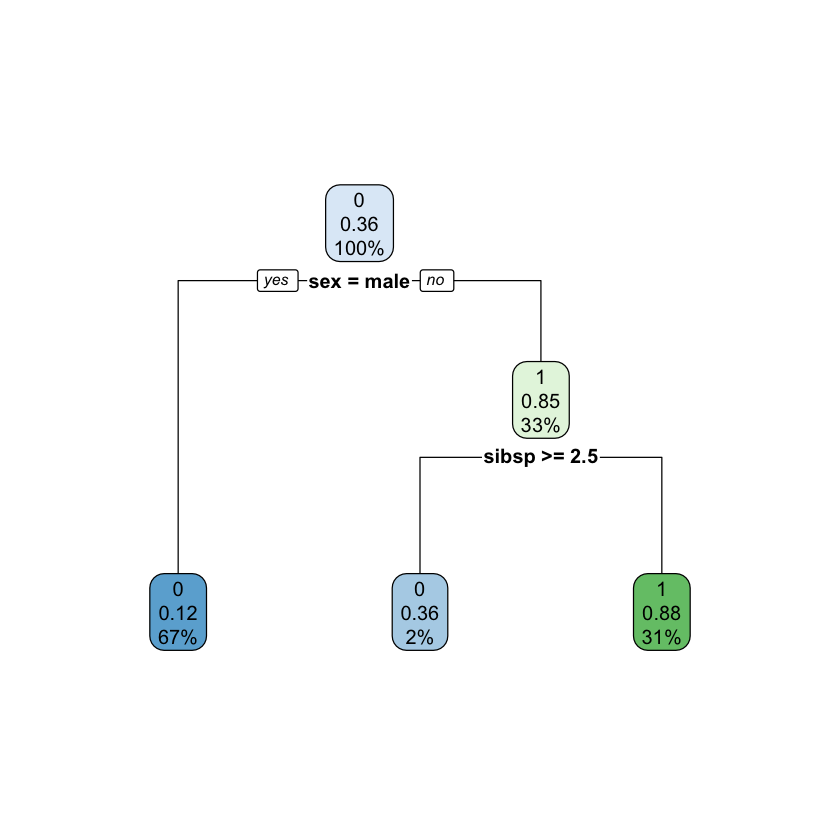

In [6]:
# Criar a árvore de decisão
library(rpart.plot)
rtree_fit <- rpart(survived ~ ., .data$training)
rpart.plot(rtree_fit)

# Conclusões:

## [Regra 1]: Vemos que a variável com menor entropia (a que gera a primeira divisão nos dados) é a variável de `gênero`. Na sequência vem a variável do `preço da tarifa`, que está diretamente correlacionada com o fato dos passageiros serem da *_primeira, segunda ou terceira classe_*. Neste ponto, já conseguimos chegar na primeira regra: 

### * *`se o indivíduo era homem e havia pago menos de 52 na sua tarifa, então ele morreria`*. 

### P.S.: Este primeiro grupo (o primeiro grupo da esquerda) já corresponde a 57% do total de indivíduos.

## [Regra 2]: O segundo grupo mais representativo é o penúltimo da esquerda para a direita, que corresponde à 23% do total de indivíduos no Titanic. Para chegar até este grupo, composto por *_100% de sobreviventes_*, a regra da árvore de decisão ficou a seguinte: 

### *`Se o indivíduo fosse mulher e houvesse pago mais de 48 na tarifa, então sobreviveria`.*

### P.S.: Ou seja, mulheres, que pagaram menos de 48 e tinham um bom número de familiares viajando também (mais de 2,5 entre irmãos e cônjuges, em média; e mais de 3,5 entre pais e filhos, em média). 



### ---------------------------------------------------------------------------------------------------------------------------

# Estudo de Caso: `Avaliação de Ações no IBOVESPA`

### ----------------------------------------------------------------------------------------------------------------------------

## Este segundo exemplo é uma aplicação de árvore de decisão para o contexto financeiro. O propósito é `identificar o perfil das melhores ações da B3, a bolsa brasileira, em termos de retorno histórico dos últimos 5 anos`.

In [7]:
# Lendo dataset de repositório
fundamentals <- "https://gitlab.com/dados/open/raw/master/br-stocks-fundamentals.csv" %>% read_csv

Parsed with column specification:
cols(
  classe = col_character(),
  codigo = col_character(),
  vm = col_double(),
  gc = col_logical(),
  lc = col_double(),
  roe = col_double(),
  divbr_pl = col_double(),
  ll = col_logical(),
  ll_cresc = col_logical(),
  p_vpa = col_double(),
  pl = col_double(),
  ret_anual = col_double()
)


In [8]:
# Selecionando algumas variáveis para mostrar o head
fundamentals %>%
  arrange(desc(ret_anual)) %>%
  select(codigo, ret_anual, pl, vm, p_vpa, divbr_pl) %>%
  head() %>% 
  xtable() %>% 
  print(type = "html", digits = 2, include.rownames=FALSE)

<!-- html table generated in R 3.5.1 by xtable 1.8-3 package -->
<!-- Tue Apr  9 20:28:05 2019 -->
<table border=1>
<tr> <th> codigo </th> <th> ret_anual </th> <th> pl </th> <th> vm </th> <th> p_vpa </th> <th> divbr_pl </th>  </tr>
  <tr> <td> MGLU3 </td> <td align="right"> 90.31 </td> <td align="right"> 35.93 </td> <td align="right"> 14303781.95 </td> <td align="right"> 7.53 </td> <td align="right"> 34.30 </td> </tr>
  <tr> <td> UNIP3 </td> <td align="right"> 69.97 </td> <td align="right"> 4.58 </td> <td align="right"> 1823980.59 </td> <td align="right"> 1.61 </td> <td align="right"> 91.21 </td> </tr>
  <tr> <td> REDE3 </td> <td align="right"> 49.55 </td> <td align="right"> 44.13 </td> <td align="right"> 7713962.86 </td> <td align="right"> 2.51 </td> <td align="right"> 125.33 </td> </tr>
  <tr> <td> BRKM3 </td> <td align="right"> 43.98 </td> <td align="right"> -11.18 </td> <td align="right"> 34822965.99 </td> <td align="right"> 7.26 </td> <td align="right"> 473.09 </td> </tr>
  <tr> <

In [15]:
head(fundamentals)

classe,codigo,vm,gc,lc,roe,divbr_pl,ll,ll_cresc,p_vpa,pl,ret_anual
ON,ABEV3,297770451,FALSE,0.8857315,16.093800,7.204760,TRUE,FALSE,6.2599830,34.66183,5.4384431
ON,PETR3,228251822,TRUE,1.7969248,2.173601,128.549155,FALSE,TRUE,0.8957594,-162.12318,4.8437257
ON,VALE3,200337453,TRUE,1.7129501,10.520790,45.993928,TRUE,TRUE,1.3761053,13.10105,11.8654039
ON,ITSA3,75317813,TRUE,2.0714297,15.849540,8.099071,TRUE,FALSE,1.4849904,8.73315,10.7941112
ON,VIVT3,70991048,FALSE,0.9133980,8.244237,10.667440,TRUE,TRUE,0.9154593,12.92826,3.6052827
ON,CIEL3,55521265,TRUE,1.3619092,27.036788,56.224920,TRUE,TRUE,5.1983318,13.88874,0.8370492


## Dicionário dos dados

#### `codigo`: código da ação negociado em bolsa;
#### `ret_anual`: retorno de 5 anos anualizado;
#### `pl`: preço sobre lucro;
#### `vm`: valor de mercado;
#### `p_vpa`: preço sobre valor patrimonial;
#### `divbr_pl`: dívida bruta sobre patrimônio líquido.

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

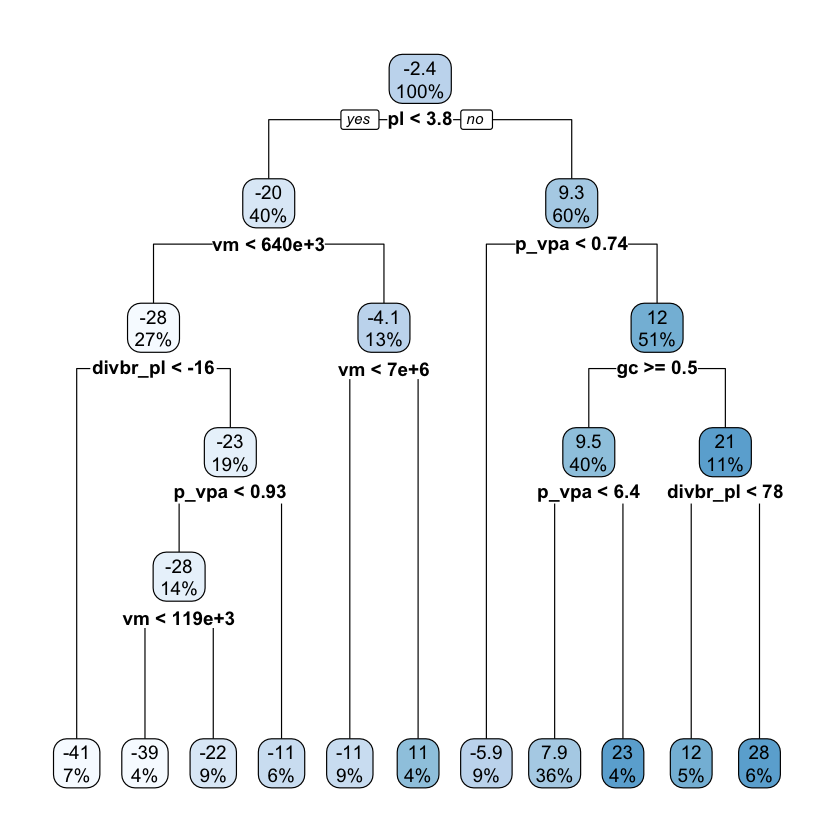

In [14]:
rtree2_fit <- rpart(ret_anual ~ ., fundamentals %>% select(-codigo))
#rtree2_fit <- rpart(ret_anual ~ ., fundamentals)
rpart.plot(rtree2_fit)

### Aproveitando esta árvore como exemplo, é possível podar a árvore criada usando a função `prune()`, como comentado anteriormente. É preciso definir pelo menos o parâmetro `cp`, o qual representa um parâmetro de `complexidade da árvore`, sendo `cp = 0` o caso mais complexo, e `cp = 1` o caso menos complexo.

In [16]:
# Utilizar o valor de CP para o menor xerror da tabela
printcp(rtree2_fit)


Regression tree:
rpart(formula = ret_anual ~ ., data = fundamentals %>% select(-codigo))

Variables actually used in tree construction:
[1] divbr_pl gc       p_vpa    pl       vm      

Root node error: 111116/190 = 584.82

n=190 (171 observations deleted due to missingness)

         CP nsplit rel error  xerror     xstd
1  0.351814      0   1.00000 1.00800 0.129392
2  0.084128      1   0.64819 0.86062 0.112662
3  0.041562      2   0.56406 0.68916 0.098606
4  0.031974      3   0.52250 0.65669 0.092787
5  0.023387      4   0.49052 0.65677 0.089187
6  0.019782      5   0.46713 0.65825 0.086513
7  0.018929      6   0.44735 0.66814 0.086103
8  0.014898      7   0.42842 0.65351 0.085497
9  0.014535      8   0.41353 0.65242 0.084535
10 0.011674      9   0.39899 0.65241 0.084841
11 0.010000     10   0.38732 0.65002 0.085415


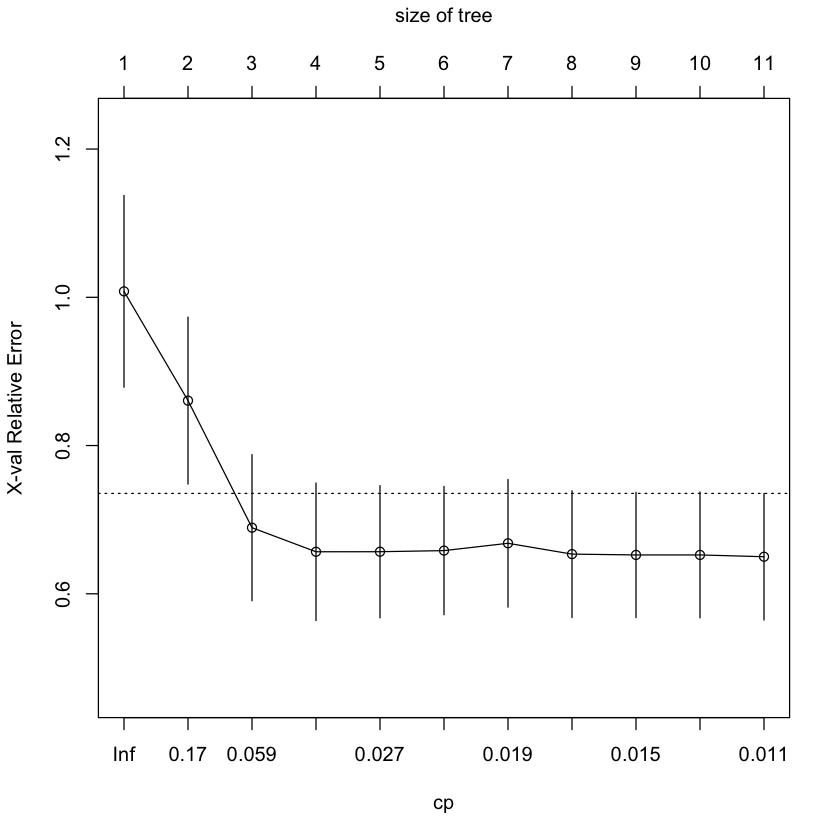

In [17]:
# Ver grraficamente o CP e o xerror
plotcp(rtree2_fit)

Warning message:
"Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."

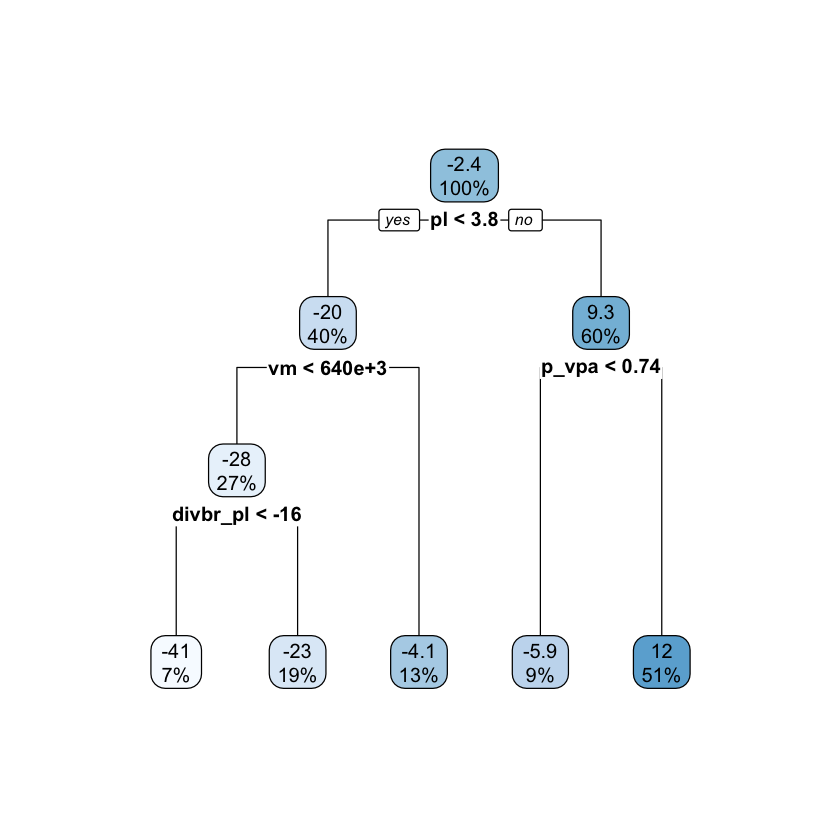

In [18]:
rpart.plot(prune(rtree2_fit, cp = 0.023387))

### Veja como a poda da árvore de decisão foca apenas nas regras mais importantes. É muito importante realizar este passo para evitar *overfitting, ou sobreajuste*.

# Conclusão

## [Regra 1]: Resumindo, se olharmos para um `Preço/Lucro (pl)` maior ou igual a 3,8; e ainda filtrarmos as ações com `P/VPA (p_vpa)` maior ou igual a 0,74, então chegaremos ao grupo com melhor rentabilidade anualizada dos últimos 5 anos. 

### P.S.: `Este é o grupo mais da direita, composto por 140 ações que geram um retorno médio anual de 12%`.

## Que tal conferirmos nos dados se a Regra 1 é verdadeira? 

### Vamos utilizar filtros para chegar à `lista do head das ações do melhor grupo`, e na sequência a `validação de que a média de retorno` bate com o `valor da árvore`.

In [28]:
#print(type = "html",

fundamentals %>%
  filter(pl >= 3.8 & p_vpa >= 0.74) %>%
  select(codigo, ret_anual, pl, vm, p_vpa, divbr_pl) %>%
  arrange(desc(ret_anual)) %>% 
  head() %>%
  xtable() %>%
  print(type = "latex",
  digits = 2,
  include.rownames = FALSE)

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Tue Apr  9 20:40:43 2019
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
codigo & ret\_anual & pl & vm & p\_vpa & divbr\_pl \\ 
  \hline
MGLU3 & 90.31 & 35.93 & 14303781.95 & 7.53 & 34.30 \\ 
  UNIP3 & 69.97 & 4.58 & 1823980.59 & 1.61 & 91.21 \\ 
  REDE3 & 49.55 & 44.13 & 7713962.86 & 2.51 & 125.33 \\ 
  SUZB5+SUZB3 & 40.54 & 137.75 & 27983601.57 & 2.59 & 136.30 \\ 
  RADL3 & 34.88 & 50.52 & 25124092.79 & 7.97 & 23.15 \\ 
  ENGI3 & 34.01 & 30.81 & 9712213.34 & 3.30 & 216.64 \\ 
   \hline
\end{tabular}
\end{table}


\begin{array}{c|c|c|c|c|c}
\hline
    {codigo} & {ret\_anual} & {pl} & {vm} & {p\_vpa} & {divbr\_pl} \\
    \hline
    MGLU3 & 90.31 & 35.93 & 14303781.95 & 7.53 & 34.30 \\ 
    UNIP3 & 69.97 & 4.58 & 1823980.59 & 1.61 & 91.21 \\ 
    REDE3 & 49.55 & 44.13 & 7713962.86 & 2.51 & 125.33 \\ 
    SUZB5+SUZB3 & 40.54 & 137.75 & 27983601.57 & 2.59 & 136.30 \\ 
    RADL3 & 34.88 & 50.52 & 25124092.79 & 7.97 & 23.15 \\ 
    ENGI3 & 34.01 & 30.81 & 9712213.34 & 3.30 & 216.64 \\ 
    \hline
\end{array}